# Projet apprentissage statistique : exercice 2

Le but de cette exercice est de comparer plusieurs méthode de machine learning sur le jeu de données liée au cancer du sein. On commencera tout d'abord par nettoyer et préparer les données avent de les répartir en echantillons de test et d'apprentissage. Nous n'oublierons pas de normaliser les données avant de commencer à entrainer nos modèles. A chaque modèle entrainer, nous générerons un score ainsi qu'une matrice de confusion pour avoir  un détails des fausses réactions aux traitements et les faux malades. Cela nous donnera une première idée sur la performance des modèles. Et enfin, pour conclure, nous représenterons les courbes de ROC pour nous permettre visuellement de comparer nos méthodes. On se propose ici de tester les méthodes suivantes :

- Regression PLS
- LASSO
- Sparse PCA + Regression linéaire

$\\$

- Un réseaux de neurone
- Random Forest
- Bagging
- Gradient Boosting
- XGBoost

Rappelons également que le but est de minimiser la catégorie des faux positifs et maximiser les vrais positifs pour ce qui est de la matrice de confusion. Mais commençons tout d'abord, par l'importation et la préparation des données.

## I. Importation et nettoyage de la base de données

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split 

# Pour normaliser et standardiser les données
from sklearn.preprocessing import StandardScaler

# Les différentes méthodes utilisées
from sklearn.decomposition import SparsePCA
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Pour les réseaux de neurones
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

### I.1 Importation et nettoyage

Par "nettoyage" on entend transposer notre dataframe (car les données sont au format variable × individu) et de supprimer les variables non génomiques. Puis, labéliser la variable $Y$ en transformant les réactions au traitement "pCR" par des $1$ et les non réactions au traitement $"RD"$ par des 0.

In [2]:
df=pd.read_csv("cancer.csv",sep=";")
df=df.set_index("Sample_geo_accession")
df=df.transpose()

df2=df.drop(['Sample_title',
    'tissue',
    'age',
    'ethnicity',
    'treatment_response',
    'T (tumor)',
    'N (Node)',
    'bmn_grade',
    'PR_status: ',
    'ER_status: ',
    'her2_status',
    'histology',
    'treatment code',
    'MAQC_Distribution_Status',
    'ID_REF'], axis=1)

Y=list(df["treatment_response"])
for i in range(len(Y)):
    if Y[i]=="RD":
        Y[i]=0
    else: Y[i]=1

C:\Users\thoma\AppData\Local\Temp\ipykernel_5972\2796134591.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255

### I.2 Division et normalisation des données

On sépare les données en échantillons de test et d'entrainements. On se propose une répartition de 20% pour les données de test. Puis on normalise les données.

In [3]:
# Séparation en échantillon de test et d'entrainements
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df2, Y, test_size=0.2)

# Normalisation avec StandarCaler()
scaler=StandardScaler()
X_train=scaler.fit_transform(Xtrain)
X_test=scaler.fit_transform(Xtest)

# Transformation des échantillons en dataframe pandas 
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
Y_train=pd.DataFrame(Ytrain)
Y_test=pd.DataFrame(Ytest)

Maintenant, les données sont prêtes à être entrainer. Nous passons donc à l'entrainements de nos modèles.

## II. Entrainements des modèles d'apprentissages

### II.1 LASSO

La methode de classification en python pour la méthode du LASSO est une regression logistic avec le paramètre de pénalisation $"l1"$. Le paramètre $"l2"$ correspond à la méthode Ridge et $"elasticnet"$ à la méthode Elasticnet tout simplement.  

c:\Users\thoma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy pour le LASSO :  0.8571428571428571


Text(50.722222222222214, 0.5, 'True label')

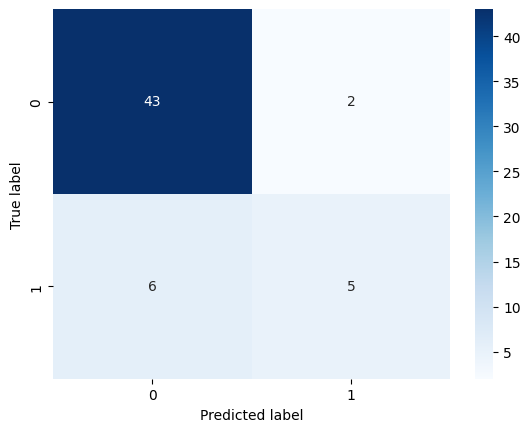

In [36]:
lasso = linear_model.LogisticRegression(penalty="l1",solver="liblinear")
lasso.fit(X_train,Y_train)

score_accuracy={}

# Prédictions pour l'accuracy
pred_lasso=lasso.predict(X_test)
score_lasso=accuracy_score(Y_test,pred_lasso)
print("Accuracy pour le LASSO : ", score_lasso)

score_accuracy["LASSO"]=score_lasso # On stockera l'accuracy de chaque méthode pour les comparer à la fin

# Prédictions de probabilité pour les courbes de ROC
pred_proba=lasso.predict_proba(X_test)

# Matrice de confusion
conf_matrix_lasso = confusion_matrix(Y_test, pred_lasso)
ax=sns.heatmap(conf_matrix_lasso, annot = True ,cmap="Blues")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

0 étant les individus ne réagissant pas au traitement, soit ceux ne guérissant pas du cancer du sein. La méthode du LASSO nous indique alors 39 individus sur 56 qui ne guérissent pas du cancer (négatifs), 3 qui sont prédit en cours de guérison alors qu'ils ne le sont pas (Faux positifs), 9 qui sont prédit que le traitement n'aura pas d'effet alors que le patient réagis au traitement (faux négatifs). Et enfin, 5 individus qui sont en voient de guérison de cancer (positif). On peut constater que le nombre de faux positif est plutôt faible ce qui est bon, malheuresement le nombre de positif est également faible mais pas surprenant car dans la vrai vie peu de gens guerrissent du cancer. Voyons maintenant la méthode suivante, la régression PLS.

### II.2 La régression PLS

Comme il s'agit ici d'une méthode de régression, nous n'avons pas accès à la fonctionnalité $predict \text{ } proba$ qui nous donnais directement la probabilité que les individus soit classés en 0 ou en 1. Néanmoins, nous avons la fonction $predict$ qui nous renvoie les valeurs ci-dessus, c'est à nous maintenant d'appliquer notre propre règle de décision pour classer les individus en 0 ou en 1. Nous choisissons comme règle :

- Si $ \text{ } pred \text{ } <=  \text{ } 0.5 \quad \Rightarrow \quad 0$
- Si $ \text{ } pred \text{ } > \text{ } 0.5 \quad \Rightarrow \quad 1$

On définit alors un fonction en entrée, valeurs de prédictions du modèle et la règle de décision que l'on souhaite appliquer.

In [37]:
def y_pred_transform(prediction, regle_decision):
    pred=np.copy(prediction) # pour garder les valeurs numériques
    for i in range(len(pred)):
        
        if pred[i] <= regle_decision:
            pred[i]= 0 # ne reagit pas
        
        else: pred[i] = 1

    pred = [int(pred[i]) for i in range(len(pred))] # pour transformer les 0 et 1 en entier
    return pred

Accuracy pour la régression PLS :  0.8035714285714286


Text(50.722222222222214, 0.5, 'True label')

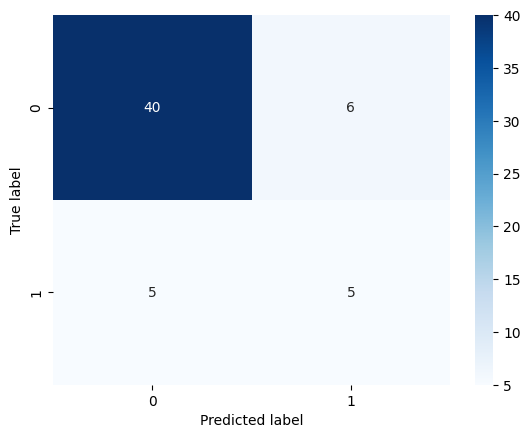

In [38]:
pls = PLSRegression(n_components=2)
pls.fit(X_train,Y_train)

# Prédictions et accuracy
pred_pls=pls.predict(X_test)
pred_pls=pred_pls.reshape(1,-1)[0] # Pour mettre sous forme d'un simple array
pred_PLS=y_pred_transform(pred_pls, 0.5) # Pour transformer en 0 et 1 suivant la règle de décision

score_pls=accuracy_score(Y_test,pred_PLS)
print("Accuracy pour la régression PLS : ", score_pls)

score_accuracy["PLS"]=score_pls

# Matrice de confusion
conf_matrix_pls=confusion_matrix(pred_PLS,Y_test)
ax=sns.heatmap(conf_matrix_pls, annot = True ,cmap="Blues")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

Nous avons pour la méthode $PLS$ une accuracy de 0.78, ce qui est plus bas que le $LASSO$ mais qui reste tout de même bon. Regardons la matrice de confusion, on peut voir que la regression $PLS$ catégorise davantage les individus comme ne réagissant pas au traitement. Comme on peut le voir, seulement 3 sur 56 individus sont classés comme étant en guérison et 11 sont classé faux positif ce qui est assez important. Passons maintenant au $Sparce PCA + Regression$.

### II.3 SparsePCA

$Sparse PCA$ est tout d'abord une méthode de réduction de dimension, c'est pour cela qu'on effectue une régression linéaire par la suite. Après avoir fitter notre modèle, on applique la fonction $transform$ pour récupérer nos composantes. Ensuite, nous appliquons un modèle de régression linéaire. Ensuite, comme pour la régression $PLS$, on applique la même rêgle de décision. Or après plusieurs test, on s'accorde à un critère à 0.3 :

- Si $ \text{ } pred \text{ } <=  \text{ } 0.3 \quad \Rightarrow \quad 0$
- Si $ \text{ } pred \text{ } > \text{ } 0.3 \quad \Rightarrow \quad 1$

c:\Users\thoma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SparsePCA was fitted with feature names
  warnings.warn(
c:\Users\thoma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SparsePCA was fitted with feature names
  warnings.warn(


Accuracy pour la méthode SparsePCA et une régression linéaire :  0.6964285714285714


Text(50.722222222222214, 0.5, 'True label')

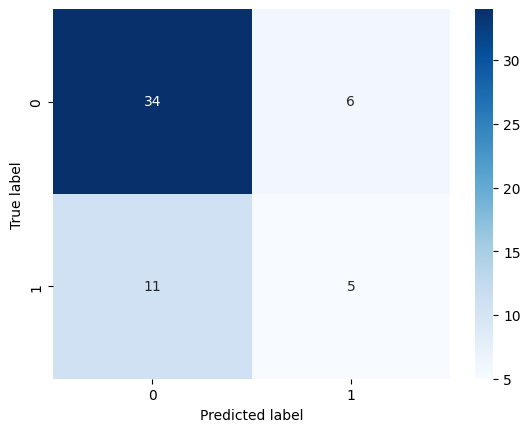

In [39]:
Spca = SparsePCA(n_components=2)
Spca.fit(df2)

X_train_pca = Spca.transform(X_train) 
X_test_pca = Spca.transform(X_test)

# Application d'une régression linéaire
regr = linear_model.LinearRegression()   
regr.fit(X_train_pca, Y_train) 

# Prédictions et accuracy
pred_spca=regr.predict(X_test_pca)
pred_spca=pred_spca.reshape(1,-1)[0] # Pour mettre sous forme d'un simple array

pred_SPCA=y_pred_transform(pred_spca, 0.3) # Pour transformer en 0 et 1 suivant la règle de décision
score_spca=accuracy_score(Ytest,pred_SPCA)
print("Accuracy pour la méthode SparsePCA et une régression linéaire : ",score_spca)

score_accuracy["SparsePCA"]=score_spca

# Matrice de confusion
conf_matrix_spca=confusion_matrix(pred_SPCA,Y_test)
ax=sns.heatmap(conf_matrix_spca, annot = True ,cmap="Blues")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

L'interprétation est la même que pour le $LASSO$ et la regression $PLS$. Passons à un algorithme complétement différent : les réseau de neurones.

### II.4 Un réseaux de neurones

On commence par préciser nos couches. après plusieurs test de paramètres et de fonction d'activation, on se propose d'appliquer le shéma suivant :

- Cinq couches $Relu$ avec 10 neurones
- Un dropout de 0.5
- Une dernière couche avec comme fonction d'activation une $sigmoïd$
- un optimizer $adam$ et une métrique "mae" (mean absolute error)

Et comme hyper paramètres :

- Un batch_size standard à 32
- Une epochs à 100
- Et une validation split de 0.2

In [4]:
# Initialisation 
classifier=Sequential()

# Ajout de la couche cachée
classifier.add(Dense(units = 10, input_dim = 22283,activation="relu"))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 10,activation="relu"))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 10,activation="relu"))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 10,activation="relu"))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 10,activation="relu"))

# Ajout de la couche de sortie
classifier.add(Dense(units = 1, activation="sigmoid"))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['mae'])

In [5]:
history = classifier.fit(X_train, Y_train, batch_size = 32, epochs = 100, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 2s 42ms/step - loss: 0.7314 - mae: 0.4924 - val_loss: 0.7828 - val_mae: 0.5364
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 0.7635 - mae: 0.4671 - val_loss: 0.8430 - val_mae: 0.5568
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 1.1716 - mae: 0.4615 - val_loss: 0.7497 - val_mae: 0.5213
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 0.9380 - mae: 0.4599 - val_loss: 0.6944 - val_mae: 0.4985
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.8664 - mae: 0.4494 - val_loss: 0.6889 - val_mae: 0.4960
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 0.8966 - mae: 0.4426 - val_loss: 0.6827 - val_mae: 0.4925
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 0.8958 - mae: 0.4366 - val_loss: 0.6693 - val_mae: 0.4853
Epoch 8/100
6/6 [==============================] - 0s 12ms/step - loss: 0.8263 - mae: 0.43

On récupère notre fonction de perte et on l'affiche.

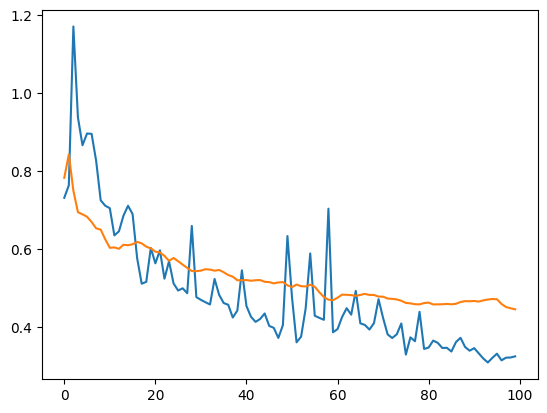

In [6]:
hist=pd.DataFrame(history.history)

plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

On peut voir qu'il n'y a pas de surapprentissage, néanmoins ce modèle ne semble pas incroyable. Passons aux prédictions.

#### Prédictions

2/2 [==============================] - 0s 5ms/step
Accuracy pour le réseaux de neurones :  0.8035714285714286


Text(50.722222222222214, 0.5, 'True label')

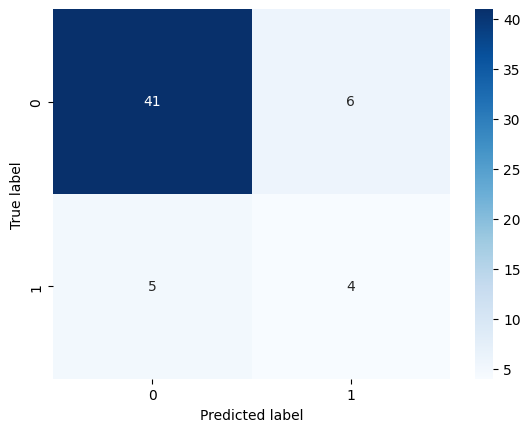

In [9]:
pred_nn = classifier.predict(X_test)
pred_nn=pred_nn.reshape(1,-1)[0]
Y_pred_nn = (pred_nn > 0.35) # Comme la fonction y_pred_transform

score_nn = accuracy_score(Y_test, Y_pred_nn)
print("Accuracy pour le réseaux de neurones : ",score_nn)

#score_accuracy["Neural Network"]=score_nn

# Matrice de confusion
conf_matrix_neural_network=confusion_matrix(Y_pred_nn,Y_test)
ax=sns.heatmap(conf_matrix_neural_network, annot = True ,cmap="Blues")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

Idem que pour la méthode $Sparse PCA$ après plusieurs test il semblerait que la meilleur rêgle de décision soit à 0.35. Voyons ce que donne la matrice de confusion. Regardons maintenant les méthode de classification $RandomForest$, $Bagging$, $Gradient Boosting$ et $XGBoost$.

### II.5 RandomForest, Bagging, Gradient Boosting, XGBoost

#### a. RandomForest

Nous sommes ici sur des méthodes de classification, nous pouvons donc utiliser la fonction $predict \text{ } proba$ pour nos prédictions.

C:\Users\thoma\AppData\Local\Temp\ipykernel_18060\3756757265.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


Accuracy pour Random Forest :  0.8035714285714286


Text(50.722222222222214, 0.5, 'True label')

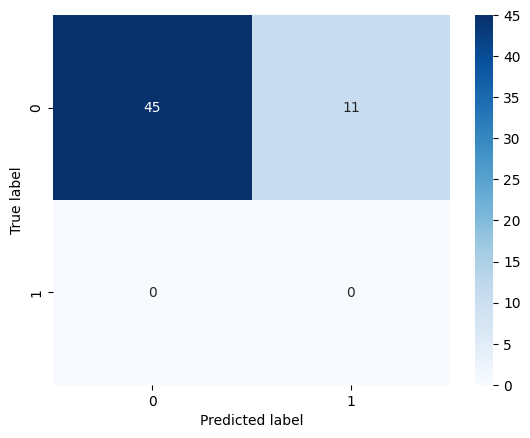

In [44]:
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

Y_pred_clf=clf.predict(X_test) # renvoie que des 0
score_clf=accuracy_score(Y_test,Y_pred_clf)
print("Accuracy pour Random Forest : ", score_clf)

score_accuracy["Random Forest"]=score_clf

pred_clf=clf.predict_proba(X_test)

# Matrice de confusion
conf_matrix_clf=confusion_matrix(Y_pred_clf,Y_test)
ax=sns.heatmap(conf_matrix_clf, annot = True ,cmap="Blues")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

On peut voir qu'il n'y a aucun individus prédit comme réagissans au traitement et aussi aucun faux positif.

#### Bagging

c:\Users\thoma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:804: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy pour le Bagging :  0.7857142857142857


Text(50.722222222222214, 0.5, 'True label')

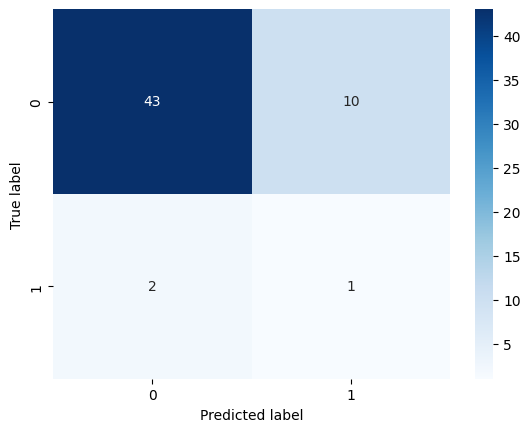

In [45]:
bagging = BaggingClassifier()
bagging.fit(X_train, Y_train)

y_pred_bagging=bagging.predict(X_test) # renvoie que des 0 ou 1
score_bagging=accuracy_score(Y_test,y_pred_bagging)
print("Accuracy pour le Bagging : ", score_bagging)

score_accuracy["Bagging"]=score_bagging

pred_bagging=bagging.predict_proba(X_test)

# Matrice de confusion
conf_matrix_bagging=confusion_matrix(y_pred_bagging,Y_test)
ax=sns.heatmap(conf_matrix_bagging, annot = True ,cmap="Blues")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

Selon la méthode du bagging, seulement 1 individus est prédit comme réagissant au traitement et seulement 2 faux positif.

### c. Gradient Boosting

c:\Users\thoma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy pour Gradient Boosting :  0.7678571428571429


Text(50.722222222222214, 0.5, 'True label')

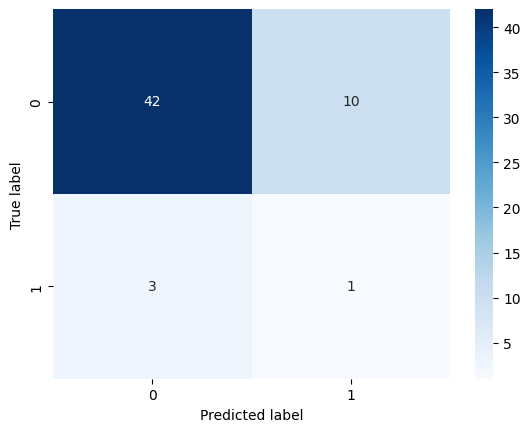

In [46]:
GradBoost = GradientBoostingClassifier()
GradBoost.fit(X_train, Y_train)

y_pred_gb=GradBoost.predict(X_test) # renvoie que des 0
score_gb=accuracy_score(Y_test,y_pred_gb)
print("Accuracy pour Gradient Boosting : ",score_gb)

score_accuracy["GradientBoosting"]=score_gb

pred_gb=GradBoost.predict_proba(X_test)

# Matrice de confusion
conf_matrix_gb=confusion_matrix(y_pred_gb,Y_test)
ax=sns.heatmap(conf_matrix_gb, annot = True ,cmap="Blues")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

#### d. XGBoost

Accuracy pour le XGBoost :  0.8035714285714286


Text(50.722222222222214, 0.5, 'True label')

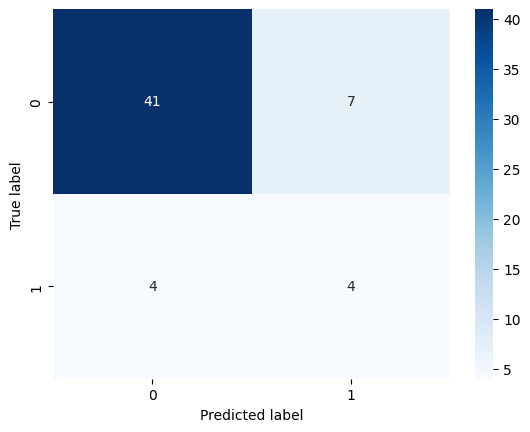

In [47]:
XGBoost = XGBClassifier()
XGBoost.fit(X_train, Y_train)

y_pred_xgb=XGBoost.predict(X_test) # renvoie que des 0
score_xgb=accuracy_score(Y_test,y_pred_xgb)
print("Accuracy pour le XGBoost : ",score_xgb)

score_accuracy["XGBoost"]=score_xgb

pred_xgb = XGBoost.predict_proba(X_test)

# Matrice de confusion
conf_matrix_xgb=confusion_matrix(y_pred_xgb,Y_test)
ax=sns.heatmap(conf_matrix_xgb, annot = True ,cmap="Blues")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

Ici, les individus réagissant au traitement sont tous prédit en faux négatif et nous avons seulement 1 individus prédit en faux positif. Passons maintenant à la comparaison et la performance de nos classifieurs. Pour cela, nous utilisons les courbes de ROC construitent à partir des taux de vrai est faux positifs. Il s'agit de la probabilités qu'un individus appartiennent à la classe 1, c'est à dire aux personnes réagissant au traitement. 

## III. Les courbes ROC

### III.1 Histogramme des accuracy

<AxesSubplot: xlabel='methode'>

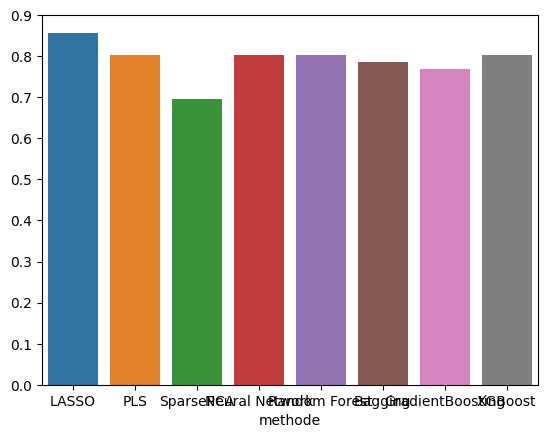

In [48]:
score=[]
index=[]
for key,value in score_accuracy.items():
    score.append(value)
    index.append(key)

hist_accuracy=pd.DataFrame(score)
hist_accuracy["methode"]=index
hist_accuracy=hist_accuracy.set_index("methode").transpose()
sns.barplot(data=hist_accuracy)

D'après cet histogramme, seul la méthode du $LASSO$ semble être meilleur que les autres méthodes qui elle semble être équivalentes hormis la méthode de $SparsePCA$ qui se trouve légèrement en dessous des autres. Regardons maintenant les courbes de ROC. Nous ne représenterons que les méthode de classification $LASSO$, $Random Forest$, $Bagging$, $Gradient Boosting$ et $XGboost$ pour éviter de ne trop surcharger le graphique et qu'il ne soit plus lisible.

In [49]:
def plot_roc_curve(fper, tper):
    methode=["LASSO","RandomForest","Bagging","GradientBoosting","XGBoost"]
    for i in range(len(fper)):
        plt.plot(fper[i], tper[i], label=methode[i])
    
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Les courbes ROC')
    plt.legend()
    plt.show()

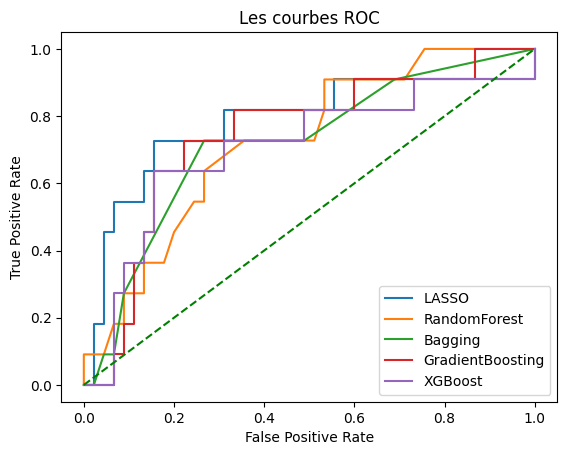

In [50]:
fper_lasso, tper_lasso, thresholds_lasso = roc_curve(Ytest, pred_proba[:,1])
fper_clf, tper_clf, thresholds_clf = roc_curve(Y_test, pred_clf[:,1])
fper_bagging, tper_bagging, thresholds_bagging = roc_curve(Ytest, pred_bagging[:,1])
fper_gb, tper_gb, thresholds_gb = roc_curve(Ytest, pred_gb[:,1])
fper_xgb, tper_xgb, thresholds_xgb = roc_curve(Ytest, pred_xgb[:,1])

plot_roc_curve([fper_lasso,fper_clf,fper_bagging,fper_gb,fper_xgb], [tper_lasso,tper_clf,tper_bagging,tper_gb,tper_xgb])

Les courbes de ROC fournissent un critère visuel. L'air sous la courbe indique la probabilité que le classifieur prédise un score d'appartenance à la classe 1 qui serait supérieur à celui d'appartenir à la classe 0 (individus ne réagissant pas au traitement).

## Conclusion

Pour conclure, gràce au critère graphique des courbres de ROC, nous pouvons visuellement dire que le meilleur classifieur est la méthode du $LASSO$. Les méthodes comme , $RandomForest$, $XGBoost$ semblent être à peu près équivalent. Bien sûr, il s'agit d'un critère visuel, pour avoir plus de certitude il faudrait pour cela calculer l'aire sous chaque courbes. De plus, les résultats que nous trouvons ne sont pas absolu puisque cela dépend beaucoup du découpage aléatoire en échantillons test et d'apprentissages. Se qui veut dire que si nous relançons le programme, nous aurons des résultats différents.